# **Proyek Analisis Data: Bike Sharing**
- Nama: Lingga Rizki Mandala
- Email: linggarizkim@gmail.com
- Id Dicoding: linggamandala

## **Menentukan Pertanyaan Bisnis**

1. Berapa banyak pengguna bike sharing berdasarkan harian, bulanan, dan musim?
2. Berapa banyak penggunaka bike sharing yang menggunakan fasilitas tersebut di hari kerja?
3. Bagaimana kondisi cuaca mempengaruhi jumlah pengguna bike sharing?

## **Menyiapkan semua library yang dibutuhkan**

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### Load Data

In [2]:
df = pd.read_csv('data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dataset shape

In [4]:
print('Dataset terdiri dari', df.shape[0], 'baris dan', df.shape[1], 'kolom')

Dataset terdiri dari 731 baris dan 16 kolom


### Assessing Data

Mengecek null value

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mencari data duplikat

In [6]:
print('Dataset mempunyai data duplikat sebanyak:', df.duplicated().sum())

Dataset mempunyai data duplikat sebanyak: 0


Dataset tidak mempunyai null value dan duplikat, sehingga aman untuk tahap selanjutnya.

### Cleaning Data

Menghapus kolom instant dan dteday karena tidak diperlukan

In [7]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

Mengubah nama kolom yr, mnth, weathersit, hum, dan cnt

In [8]:
df = df.rename(columns={'yr':'year', 'mnth':'month', 'weathersit':'weather', 'hum':'humidity', 'cnt':'count'})

Mengkonversi nilai

In [9]:
df['season'] = df['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'))
df['year'] = df['year'].replace((0, 1), (2011, 2012))
df['holiday'] = df['holiday'].replace((0, 1), ('No', 'Yes'))
df['weekday'] = df['weekday'].replace((0, 1, 2, 3, 4, 5, 6), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
df['workingday'] = df['workingday'].replace((0, 1), ('No', 'Yes'))
df['weather'] = df['weather'].replace((1, 2, 3, 4), ('Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'))

Mengubah tipe data

In [10]:
df['season'] = df['season'].astype('object')
df['year'] = df['year'].astype('object')
df['month'] = df['month'].astype('object')
df['holiday'] = df['holiday'].astype('object')
df['weekday'] = df['weekday'].astype('object')
df['workingday'] = df['workingday'].astype('object')
df['weather'] = df['weather'].astype('object')

Normalisasi nilai pada kolom temp, atemp, humidity, dan windspeed

In [11]:
df['temp'] = df['temp']*41 #==> Normalized temperature in Celsius. The values are divided to 41 (max)
df['atemp'] = df['atemp']*50 #==> Normalized feeling temperature in Celsius. The values are divided to 50 (max)
df['humidity'] = df['humidity']*100 #==> Normalized humidity. The values are divided to 100 (max)
df['windspeed'] = df['windspeed']*67 #==> Normalized wind speed. The values are divided to 67 (max)

## **Exploratory Data Analysis (EDA)**

### Statistical Summary

Hasil dataset setelah cleaning

In [12]:
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,Spring,2011,1,No,Saturday,No,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2011,1,No,Sunday,No,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2011,1,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2011,1,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2011,1,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


Memisahkan dataset antara kategori dengan numerikal

In [13]:
cats = df.select_dtypes(include='object').columns.tolist()
nums = df.select_dtypes(exclude='object').columns.tolist()

In [14]:
df[cats].describe()

,season,year,month,holiday,weekday,workingday,weather
count,731,731,731,731,731,731,731
unique,4,2,12,2,7,2,3
top,Fall,2012,1,No,Saturday,Yes,Clear
freq,188,366,62,710,105,500,463


In [15]:
df[nums].describe()

,temp,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576,4504.348837
std,7.505091,8.148059,14.242910,5.192357,1937.211452
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.820424,16.892125,52.000000,9.041650,3152.000000
50%,20.431653,24.336650,62.666700,12.125325,4548.000000
75%,26.872076,30.430100,73.020850,15.625371,5956.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Univariate Analysis

Boxplot (numerikal)

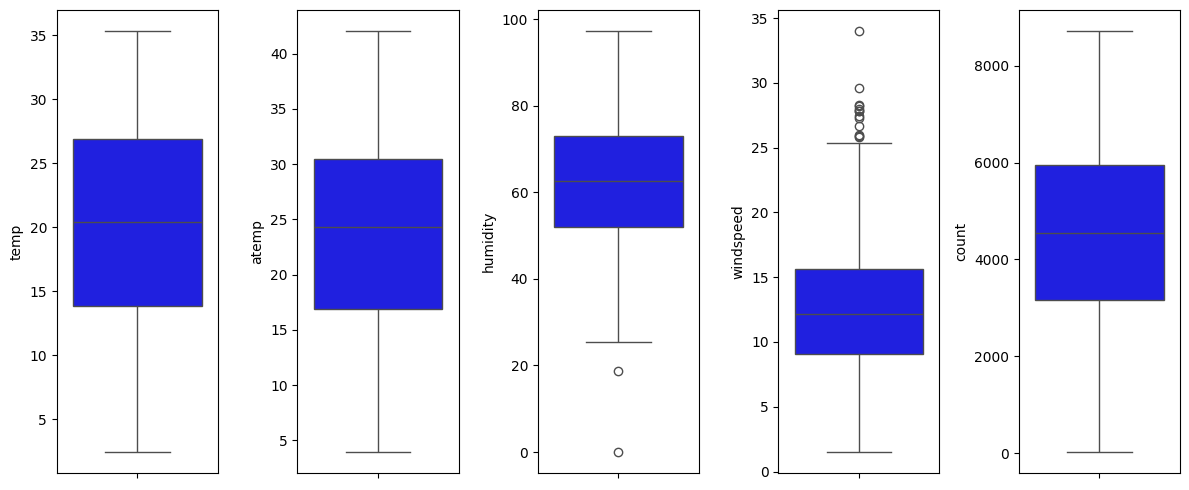

In [16]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

Distribution plot

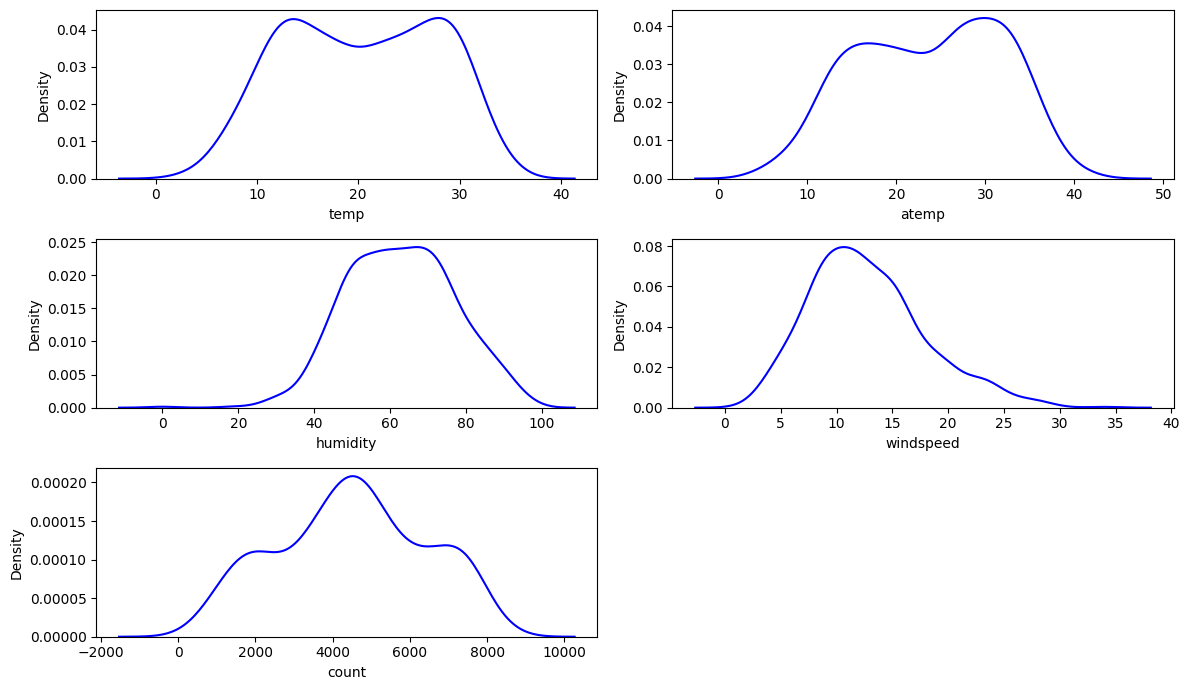

In [17]:
plt.figure(figsize=(12,7))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)//2, i+1)
    sns.kdeplot(df[nums[i]], color='blue')
    plt.tight_layout()

Count Plot (kategorikal)

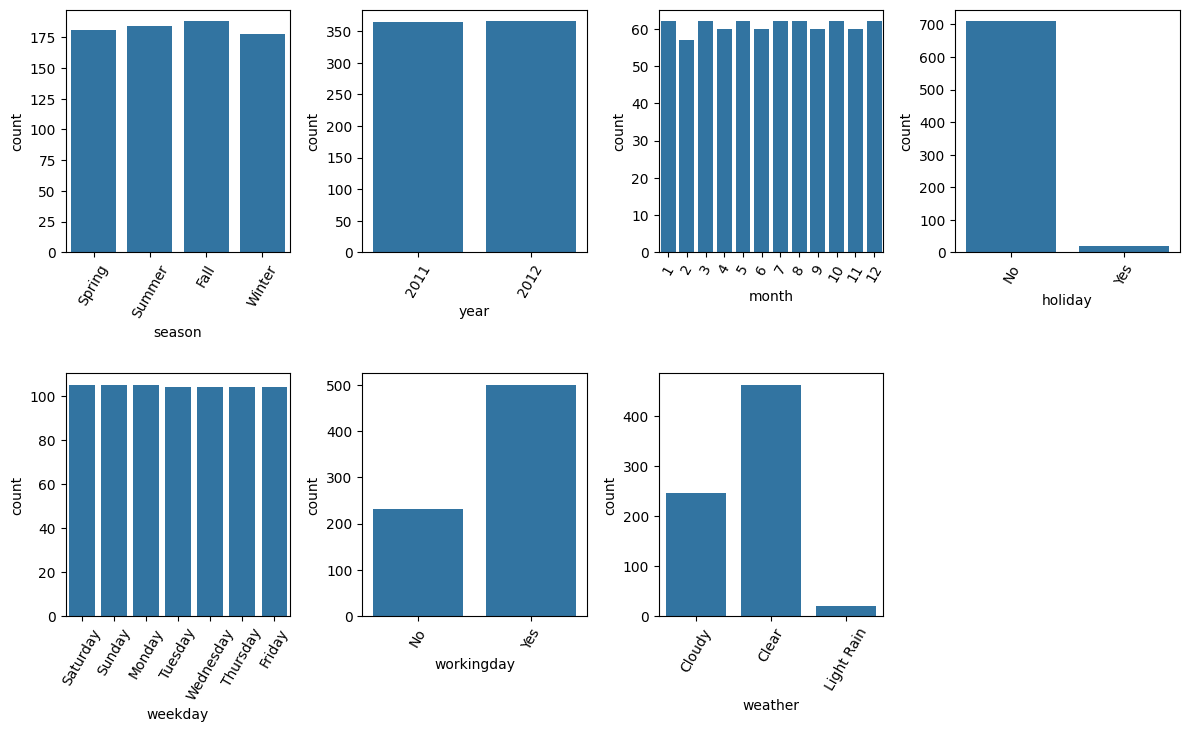

In [18]:
plt.figure(figsize=(12,10))
for i in range(0, len(cats)):
    plt.subplot(3, 4, i+1)
    sns.countplot(x=df[cats[i]])
    plt.xlabel(cats[i])
    plt.xticks(rotation=60)
    plt.tight_layout()

### Multivariate Analysis

<Axes: >

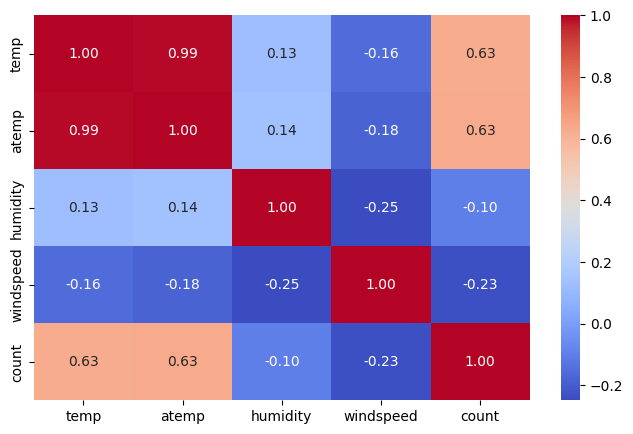

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')

## **Visualization & Explanatory Analysis**

### Pertanyaan 1: Berapa banyak pengguna bike sharing dalam harian, bulanan, dan musiman?

Pengguna Bike Sharing dalam Harian

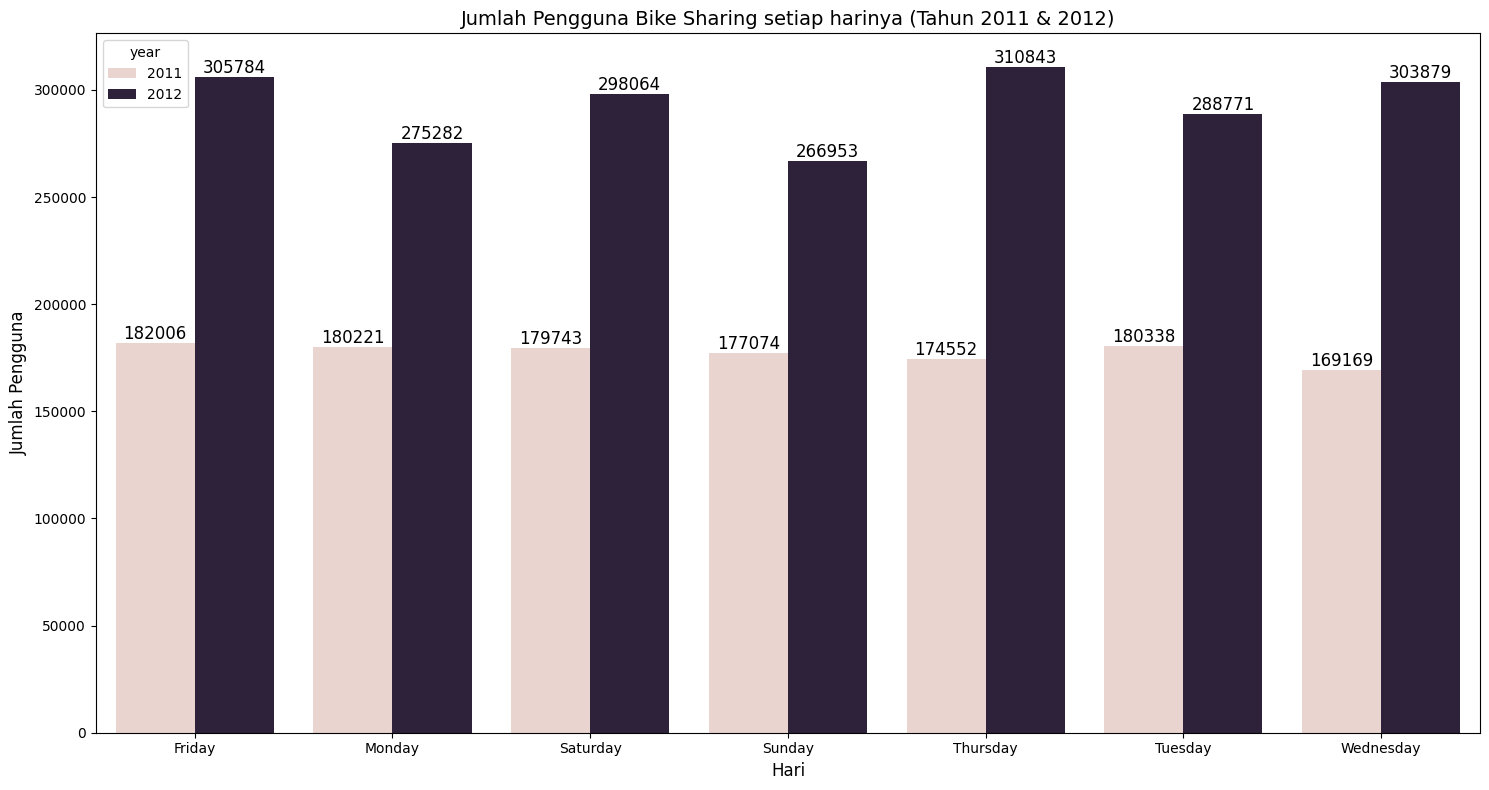

In [20]:
df_weekday = df.groupby(['year', 'weekday'])['count'].sum().reset_index()
plt.figure(figsize=(15,8))
plt.title('Jumlah Pengguna Bike Sharing setiap harinya (Tahun 2011 & 2012)', fontsize=14)
ax = sns.barplot(x='weekday', y='count', data=df_weekday, hue='year', errorbar=None)
ax.bar_label(ax.containers[0] , fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)
plt.tick_params(axis='both', which='major')
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

Pengguna Bike Sharing dalam Bulanan

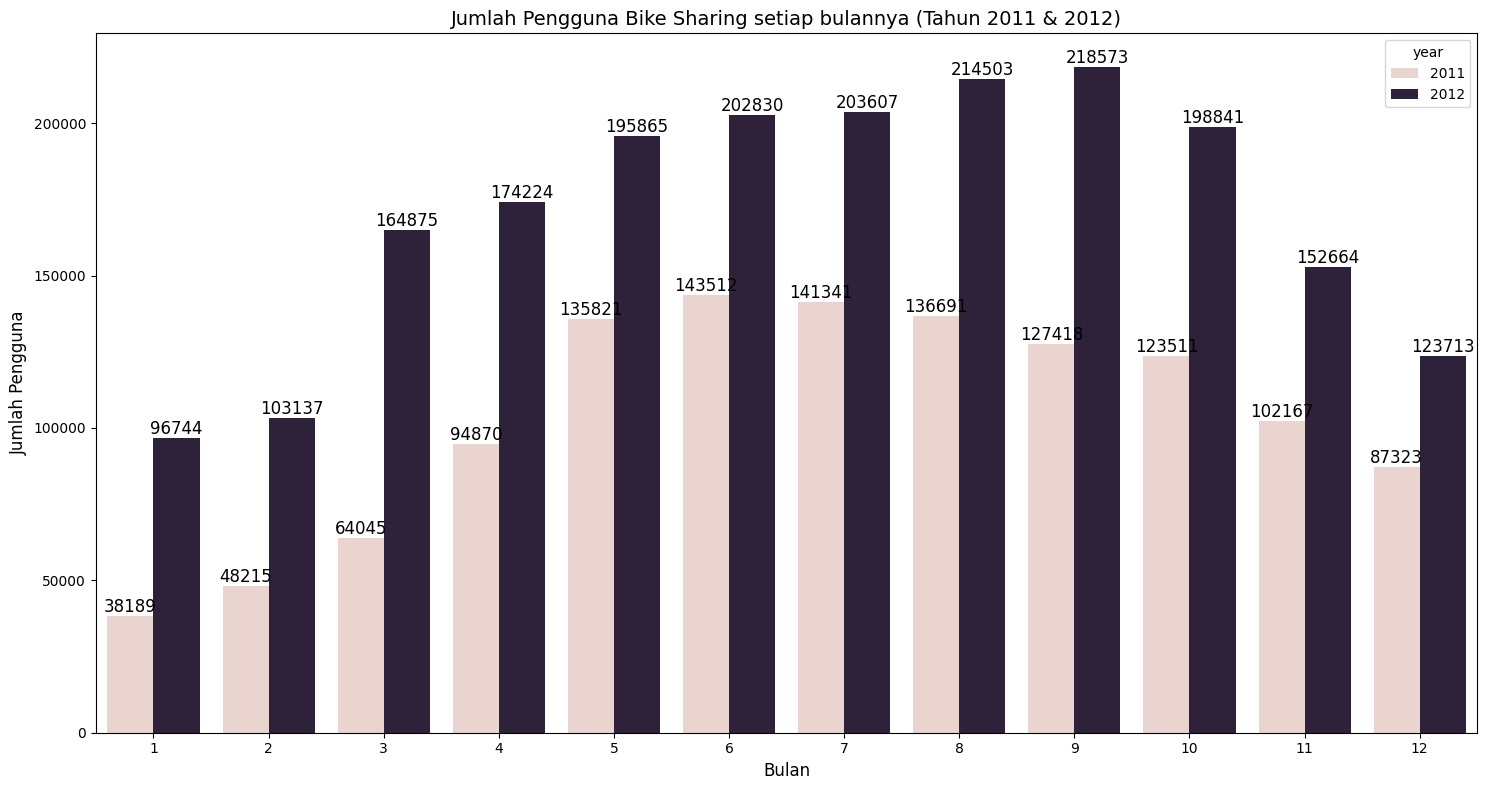

In [21]:
df_month = df.groupby(['year', 'month'])['count'].sum().reset_index()
plt.figure(figsize=(15,8))
plt.title('Jumlah Pengguna Bike Sharing setiap bulannya (Tahun 2011 & 2012)', fontsize=14)
ax = sns.barplot(x='month', y='count', data=df_month, hue='year', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)
plt.tick_params(axis='both', which='major')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

Pengguna Bike Sharing dalam Musim

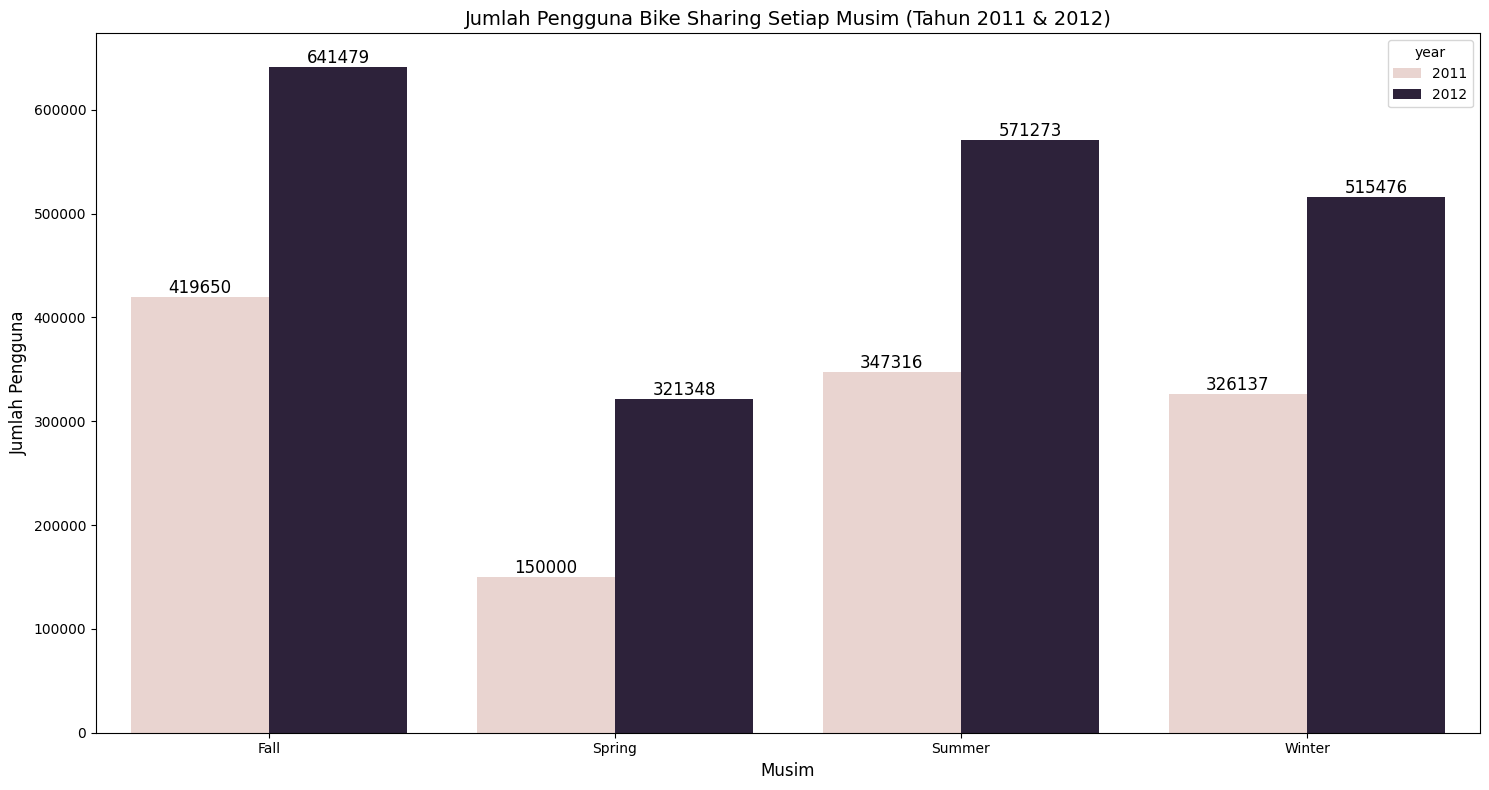

In [22]:
df_season = df.groupby(['year', 'season'])['count'].sum().reset_index()
plt.figure(figsize=(15,8))
plt.title('Jumlah Pengguna Bike Sharing Setiap Musim (Tahun 2011 & 2012)', fontsize=14)
ax = sns.barplot(x='season', y='count', data=df_season, hue='year', errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=12)
ax.bar_label(ax.containers[1], fmt='%.0f', fontsize=12)
plt.tick_params(axis='both', which='major')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapa banyak pengguna bike sharing yang menggunakan fasilitas tersebut di hari kerja?

Jumlah Pengguna Bike Sharing di Hari Kerja (Tahun 2011 & 2012)

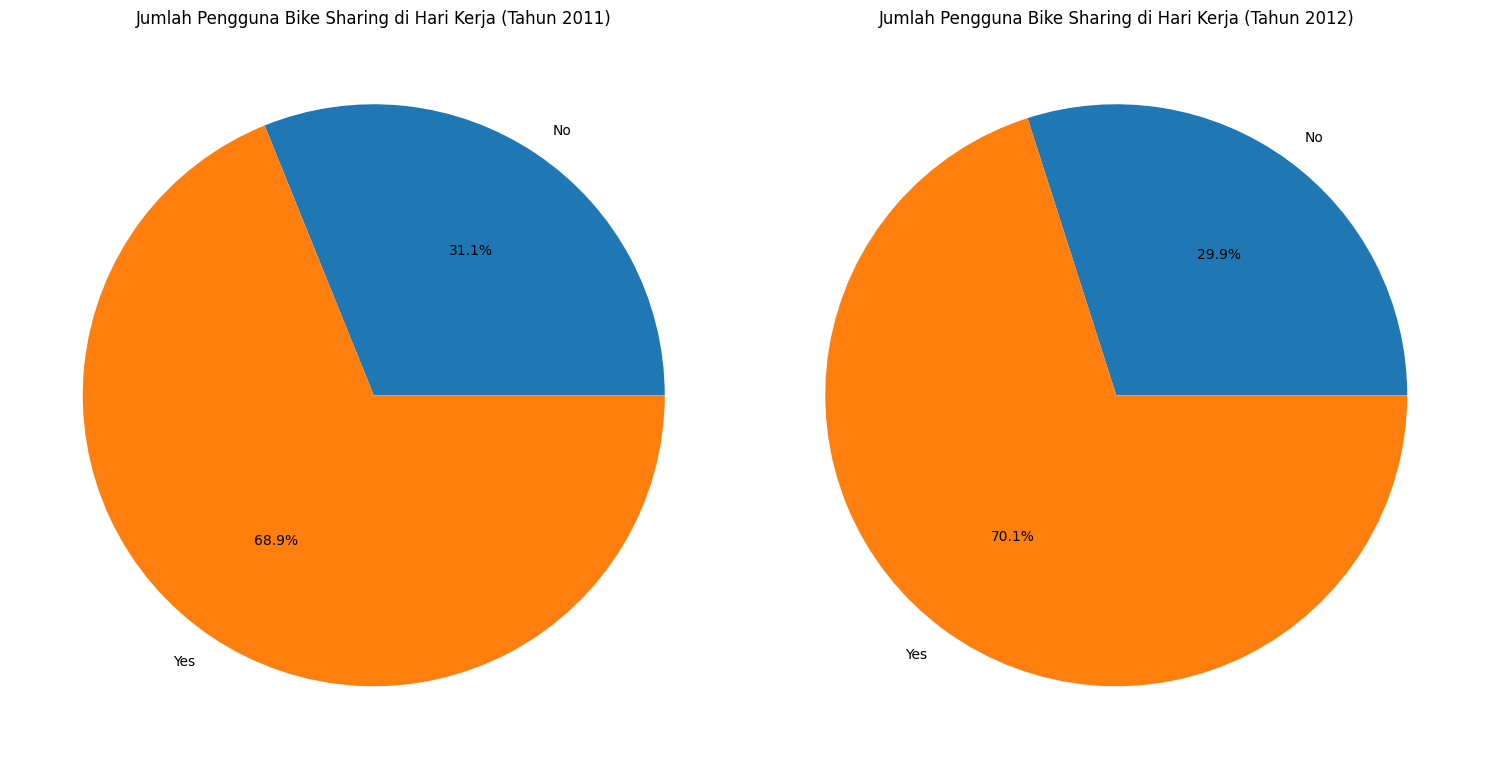

In [23]:
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
df_2011 = df_2011.groupby('workingday')['count'].sum()
plt.pie(df_2011, labels=df_2011.index, autopct='%1.1f%%', startangle=0)
plt.title('Jumlah Pengguna Bike Sharing di Hari Kerja (Tahun 2011)')

plt.subplot(1, 2, 2)
df_2012 = df_2012.groupby('workingday')['count'].sum()
plt.pie(df_2012, labels=df_2012.index, autopct='%1.1f%%', startangle=0)
plt.title('Jumlah Pengguna Bike Sharing di Hari Kerja (Tahun 2012)')

plt.tight_layout()
plt.show()

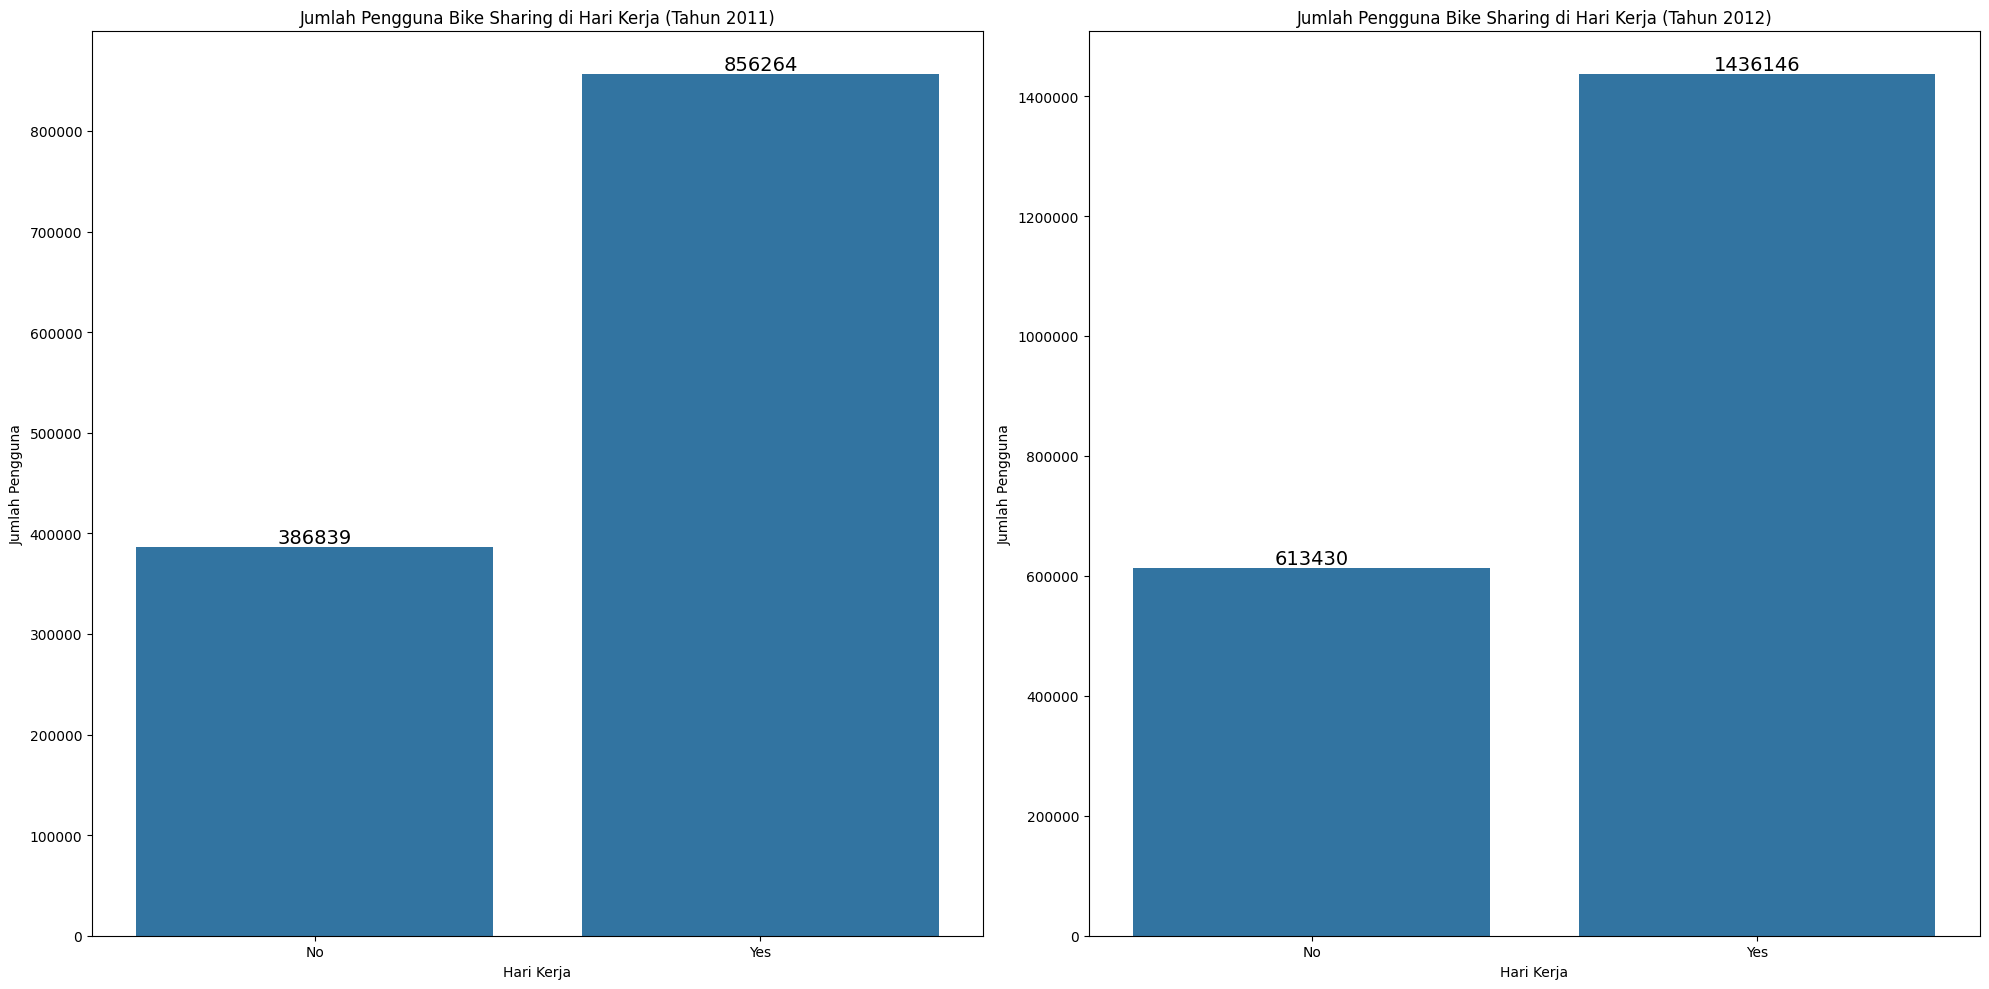

In [24]:
# Plot Tahun 2011
df_2011 = df[df['year'] == 2011]
df_2011_grouped = df_2011.groupby('workingday')['count'].sum().reset_index()

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
ax = sns.barplot(x='workingday', y='count', data=df_2011_grouped,errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=14)
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna Bike Sharing di Hari Kerja (Tahun 2011)')

# Plot Tahun 2012
df_2012 = df[df['year'] == 2012]
df_2012_grouped = df_2012.groupby('workingday')['count'].sum().reset_index()

plt.subplot(1, 2, 2)
ax = sns.barplot(x='workingday', y='count', data=df_2012_grouped, errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=14)
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna Bike Sharing di Hari Kerja (Tahun 2012)')

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


### Pertanyaan 3: Bagaimana kondisi cuaca mempengaruhi jumlah pengguna bike sharing?

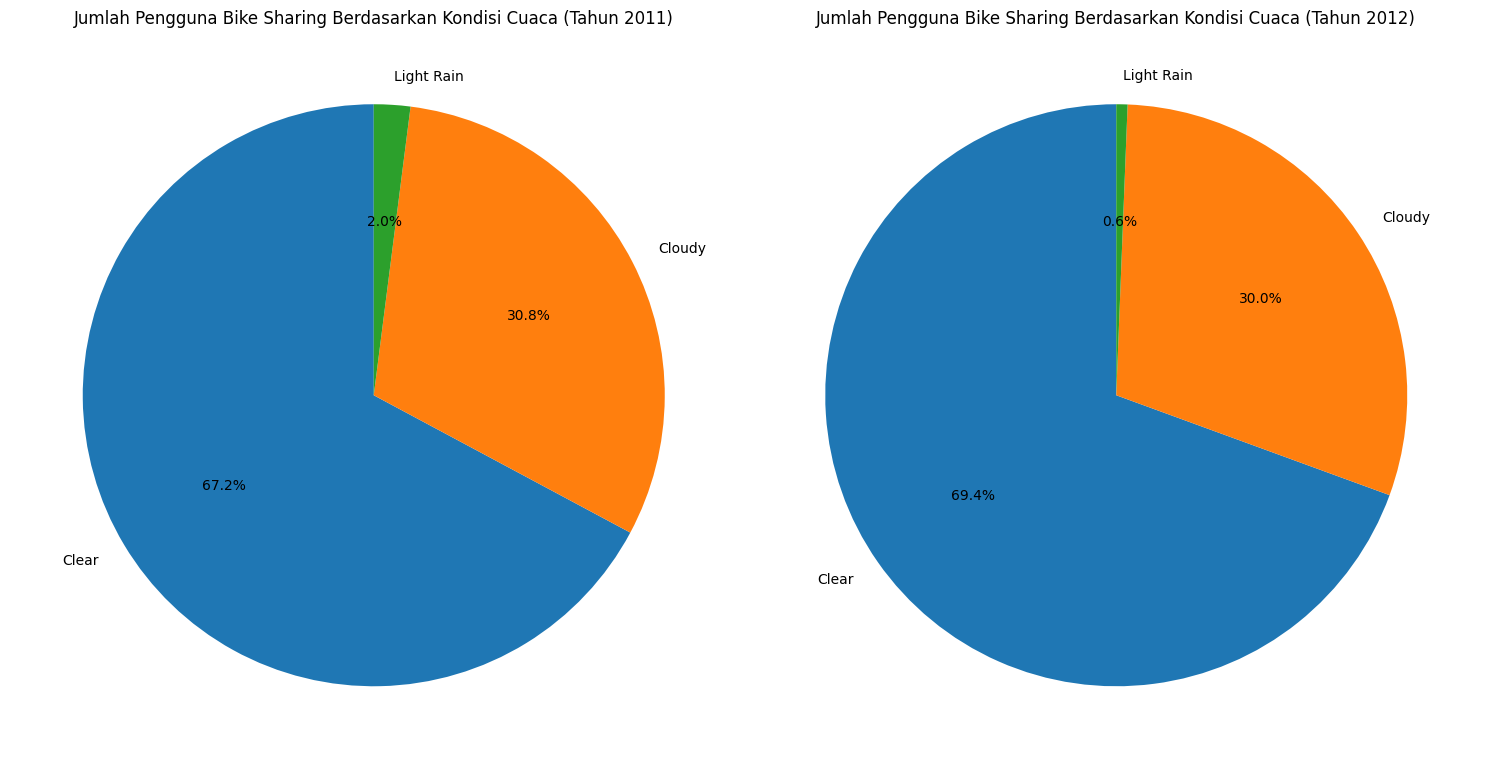

In [25]:
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
df_2011 = df_2011.groupby('weather')['count'].sum()
ax = plt.pie(df_2011, labels=df_2011.index, autopct='%1.1f%%', startangle=90)
plt.title('Jumlah Pengguna Bike Sharing Berdasarkan Kondisi Cuaca (Tahun 2011)')

plt.subplot(1, 2, 2)
df_2012 = df_2012.groupby('weather')['count'].sum()
ax = plt.pie(df_2012, labels=df_2012.index, autopct='%1.1f%%', startangle=90)
plt.title('Jumlah Pengguna Bike Sharing Berdasarkan Kondisi Cuaca (Tahun 2012)')

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana suhu rata-rata terhadap kondisi cuaca setiap bulannya?

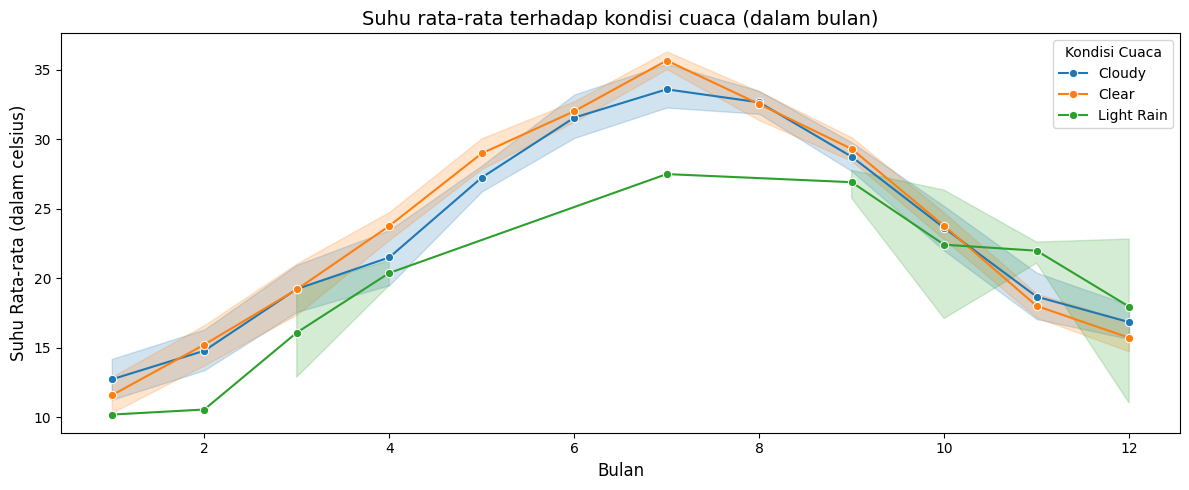

In [26]:
plt.figure(figsize=(12, 5))
plt.title('Suhu rata-rata terhadap kondisi cuaca (dalam bulan)', fontsize=14)
sns.lineplot(x='month', y='atemp', data=df, hue='weather', marker='o')
plt.tick_params(axis='both', which='major')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-rata (dalam celsius)', fontsize=12)
plt.legend(title='Kondisi Cuaca')
plt.tight_layout()

## **Conclusion**

Berdasarkan hasil visualisasi data di atas, dapat disimpulkan bahwa:

1. Pengguna rental sepeda (Bike Sharing) di kota Washington D.C, Amerika Serikat didominasi oleh pengguna pada hari kerja, yaitu mulai senin hingga sabtu. Pada tahun 2011 pengguna layanan tersebut mencapai 68.9% dan meningkat 70.1% pada tahun 2012.
2. Tahun 2011, jumlah pengguna rental sepeda harian ada rata-rata 177.586 orang, dan meningkat pada tahun 2012 dengan rata-rata pengguna 292.796 orang. Karena banyaknya pengguna di hari kerja, peningkatan pada tahun 2012 terjadi mulai hari selasa hingga puncaknya di hari jumat.
3. Kondisi cuaca juga mempengaruhi pengguna rental sepeda karena banyaknya pengguna yang menggunakan layanan tersebut pada cuaca cerah, dan hanya 30% yang menggunakan saat kondisi berawan. Tren peningkatan pengguna bisa dilihat pada bulanannya dimana tahun 2012 peningkatan terlihat saat musim semi hingga puncaknya musim panas, yaitu pada bulan maret hingga september..

# **Export Cleaned Data**

In [27]:
df.to_csv('data/cleaned_data.csv', index=False)